#### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.display import display
import ipywidgets
import warnings; warnings.filterwarnings('ignore')

/Users/thamilventhananthonysmariathas/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Load and Preview Data

In [2]:
cols = ['DayOfWeek', 'enc_Dest', 'enc_DepTime',
       'DestCityMarketID', 'enc_Origin', 'Month', 'Quarter', 'origin_long',
       'dest_long', 'enc_DestCityName', 'Distance', 'dest_elevation',
       'ArrDelay', 'DepDel15', 'ArrDel15', 'enc_OriginCityName', 'AirTime',
       'dest_lat', 'OriginCityMarketID', 'DepDelay', 'enc_Reporting_Airline',
       'enc_CRSArrTime', 'enc_Airline', 'origin_elevation', 'enc_ArrTime',
       'enc_CRSDepTime', 'enc_Flight_Number_Reporting_Airline', 'origin_lat',
       'OriginCityName', 'DestCityName']

In [3]:
airline_data = pd.read_csv('airlines_processed_data_full.csv.crdownload', usecols=cols)

airline_data.head()

,DayOfWeek,enc_Dest,enc_DepTime,DestCityMarketID,enc_Origin,Month,Quarter,origin_long,dest_long,enc_DestCityName,...,enc_Reporting_Airline,enc_CRSArrTime,enc_Airline,origin_elevation,enc_ArrTime,enc_CRSDepTime,enc_Flight_Number_Reporting_Airline,origin_lat,OriginCityName,DestCityName
0,7,176.0,978.0,32448,164.0,1,1,-95.341400,-90.075897,153.0,...,12.0,1026.0,13.0,97.0,1055.0,881.0,5196.0,29.984400,"Houston, TX","Jackson/Vicksburg, MS"
1,7,335.0,564.0,35096,247.0,1,1,-87.904800,-76.106300,321.0,...,12.0,700.0,13.0,672.0,732.0,471.0,5197.0,41.978600,"Chicago, IL","Syracuse, NY"
2,7,147.0,1093.0,34699,188.0,1,1,-118.407997,-107.218002,135.0,...,12.0,934.0,13.0,125.0,1281.0,662.0,5200.0,33.942501,"Los Angeles, CA","Hayden, CO"
3,7,94.0,559.0,30194,308.0,1,1,-122.375000,-97.038002,79.0,...,12.0,819.0,13.0,13.0,926.0,411.0,5201.0,37.618999,"San Francisco, CA","Dallas/Fort Worth, TX"
4,7,79.0,497.0,30189,188.0,1,1,-118.407997,-104.700996,70.0,...,12.0,671.0,13.0,125.0,701.0,391.0,5202.0,33.942501,"Los Angeles, CA","Colorado Springs, CO"


This is an overview of all columns in the table,and the first five rows. 

### Check the shape of the data

In [4]:
airline_data.shape

(6407, 30)

There are 6407 rows and 30 columns in the dataset

### Check the number of unique Origin and Destination Cities

In [5]:
len(np.unique(airline_data.OriginCityMarketID))

181

In [6]:
len(np.unique(airline_data.DestCityMarketID))

191

### Check the data types

In [7]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6407 entries, 0 to 6406
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   DayOfWeek                            6407 non-null   int64  
 1   enc_Dest                             6407 non-null   float64
 2   enc_DepTime                          6407 non-null   float64
 3   DestCityMarketID                     6407 non-null   int64  
 4   enc_Origin                           6407 non-null   float64
 5   Month                                6407 non-null   int64  
 6   Quarter                              6407 non-null   int64  
 7   origin_long                          6407 non-null   float64
 8   dest_long                            6407 non-null   float64
 9   enc_DestCityName                     6407 non-null   float64
 10  Distance                             6407 non-null   float64
 11  dest_elevation                

The data types of each column are as expected

### Check the correlations

In [8]:
correlation_columns = ['enc_Flight_Number_Reporting_Airline', 'dest_long', 'enc_ArrTime', 'enc_Origin', 'Quarter',
                 'dest_elevation', 'enc_Dest', 'origin_elevation', 'enc_OriginCityName', 'AirTime', 'DestCityMarketID',
                 'origin_lat', 'Month', 'enc_DepTime', 'DepDelay', 'enc_Airline', 'enc_CRSArrTime', 'DayOfWeek',
                 'enc_DestCityName', 'enc_CRSDepTime', 'enc_Reporting_Airline', 'origin_long', 'Distance', 'DepDel15',
                 'dest_lat', 'OriginCityMarketID', 'ArrDel15']


In [9]:
airline_data[correlation_columns].corr().abs()

,enc_Flight_Number_Reporting_Airline,dest_long,enc_ArrTime,enc_Origin,Quarter,dest_elevation,enc_Dest,origin_elevation,enc_OriginCityName,AirTime,...,DayOfWeek,enc_DestCityName,enc_CRSDepTime,enc_Reporting_Airline,origin_long,Distance,DepDel15,dest_lat,OriginCityMarketID,ArrDel15
enc_Flight_Number_Reporting_Airline,1.000000,0.123656,0.022492,0.048868,NaN,0.248203,0.060623,0.241625,0.052095,0.043432,...,0.199418,0.033605,0.007174,NaN,0.116014,0.048530,0.000506,0.070843,0.006486,0.023987
dest_long,0.123656,1.000000,0.040606,0.230776,NaN,0.151737,0.370674,0.160460,0.297270,0.147114,...,0.089996,0.379797,0.080824,NaN,0.770962,0.102481,0.096589,0.152720,0.216042,0.077521
enc_ArrTime,0.022492,0.040606,1.000000,0.042427,NaN,0.029505,0.009735,0.013138,0.001791,0.060165,...,0.010785,0.040377,0.768114,NaN,0.057949,0.077886,0.089989,0.025418,0.012022,0.054429
enc_Origin,0.048868,0.230776,0.042427,1.000000,NaN,0.033331,0.067063,0.232649,0.772828,0.002482,...,0.021998,0.114455,0.060874,NaN,0.328767,0.023257,0.027072,0.002640,0.639572,0.020822
Quarter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dest_elevation,0.248203,0.151737,0.029505,0.033331,NaN,1.000000,0.202319,0.264314,0.015978,0.074904,...,0.038819,0.193176,0.016930,NaN,0.169685,0.063831,0.005793,0.188626,0.028482,0.001170
enc_Dest,0.060623,0.370674,0.009735,0.067063,NaN,0.202319,1.000000,0.044251,0.114771,0.069561,...,0.014615,0.799703,0.056805,NaN,0.269925,0.042436,0.011093,0.055349,0.073774,0.008964
origin_elevation,0.241625,0.160460,0.013138,0.232649,NaN,0.264314,0.044251,1.000000,0.202357,0.041388,...,0.026426,0.035310,0.023785,NaN,0.159317,0.029079,0.035035,0.000712,0.072779,0.054948
enc_OriginCityName,0.052095,0.297270,0.001791,0.772828,NaN,0.015978,0.114771,0.202357,1.000000,0.016363,...,0.007804,0.040889,0.014827,NaN,0.371929,0.027675,0.090653,0.002820,0.629407,0.083996
AirTime,0.043432,0.147114,0.060165,0.002482,NaN,0.074904,0.069561,0.041388,0.016363,1.000000,...,0.041358,0.078324,0.071485,NaN,0.004714,0.970184,0.013259,0.097201,0.073634,0.024859


### Generate summary statistics for numerical data only

In [10]:
airline_data.describe()

,DayOfWeek,enc_Dest,enc_DepTime,DestCityMarketID,enc_Origin,Month,Quarter,origin_long,dest_long,enc_DestCityName,...,OriginCityMarketID,DepDelay,enc_Reporting_Airline,enc_CRSArrTime,enc_Airline,origin_elevation,enc_ArrTime,enc_CRSDepTime,enc_Flight_Number_Reporting_Airline,origin_lat
count,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.0,6407.0,6407.000000,6407.000000,6407.000000,...,6406.000000,6406.000000,6406.0,6406.000000,6406.0,6406.000000,6406.000000,6406.000000,6406.000000,6406.000000
mean,3.522553,194.835961,817.961761,31980.014515,192.508506,1.0,1.0,-100.994224,-101.049551,173.926799,...,31948.411801,21.027006,12.0,884.972057,13.0,1386.497815,911.220731,709.896815,3491.045738,38.948302
std,2.476505,97.851885,279.061202,1426.576837,96.736712,0.0,0.0,15.094475,15.374184,99.240464,...,1382.399047,93.877949,0.0,277.804242,0.0,1867.555776,291.590645,272.128414,1146.503436,4.456589
min,1.000000,2.000000,1.000000,30140.000000,2.000000,1.0,1.0,-124.246002,-124.246002,0.000000,...,30140.000000,-32.000000,12.0,3.000000,13.0,4.000000,0.000000,201.000000,2168.000000,25.906799
25%,1.000000,98.000000,590.000000,30820.500000,101.000000,1.0,1.0,-117.190002,-117.190002,79.000000,...,30852.000000,-7.000000,12.0,665.000000,13.0,152.000000,692.000000,486.000000,2610.000000,35.035301
50%,2.000000,216.000000,827.000000,31650.000000,211.000000,1.0,1.0,-97.433098,-97.600700,190.000000,...,31650.000000,-3.000000,12.0,902.000000,13.0,672.000000,933.000000,712.000000,3125.500000,39.861698
75%,7.000000,288.000000,1044.000000,32884.000000,276.000000,1.0,1.0,-87.904800,-87.904800,280.000000,...,32575.000000,11.000000,12.0,1106.000000,13.0,1135.000000,1141.000000,936.000000,4777.250000,41.978600
max,7.000000,357.000000,1439.000000,35582.000000,357.000000,1.0,1.0,-71.005203,-71.005203,350.000000,...,35582.000000,1431.000000,12.0,1405.000000,13.0,7820.000000,1439.000000,1316.000000,6654.000000,48.566200


The mean of each variable is on a very different scale. The 50% statics is the same as the median, it could be a normal distribution.

### Generate modal values for all data

In [11]:
airline_data.drop(['DestCityMarketID', 'OriginCityMarketID'], axis = 1).mode()

,DayOfWeek,enc_Dest,enc_DepTime,enc_Origin,Month,Quarter,origin_long,dest_long,enc_DestCityName,Distance,...,enc_Reporting_Airline,enc_CRSArrTime,enc_Airline,origin_elevation,enc_ArrTime,enc_CRSDepTime,enc_Flight_Number_Reporting_Airline,origin_lat,OriginCityName,DestCityName
0,1.0,247.0,824.0,247.0,1.0,1.0,-87.9048,-87.9048,63.0,342.0,...,12.0,1106.0,13.0,672.0,1005.0,261.0,2247.0,41.9786,"Chicago, IL","Chicago, IL"
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2251.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2252.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2262.0,NaN,NaN,NaN


The most common Origin and Destination city is Chicago

### Visualizations of data

#### Plot histograms for all numerical columns

In [12]:
airline_data_for_hist = airline_data.select_dtypes(exclude = ['bool'])

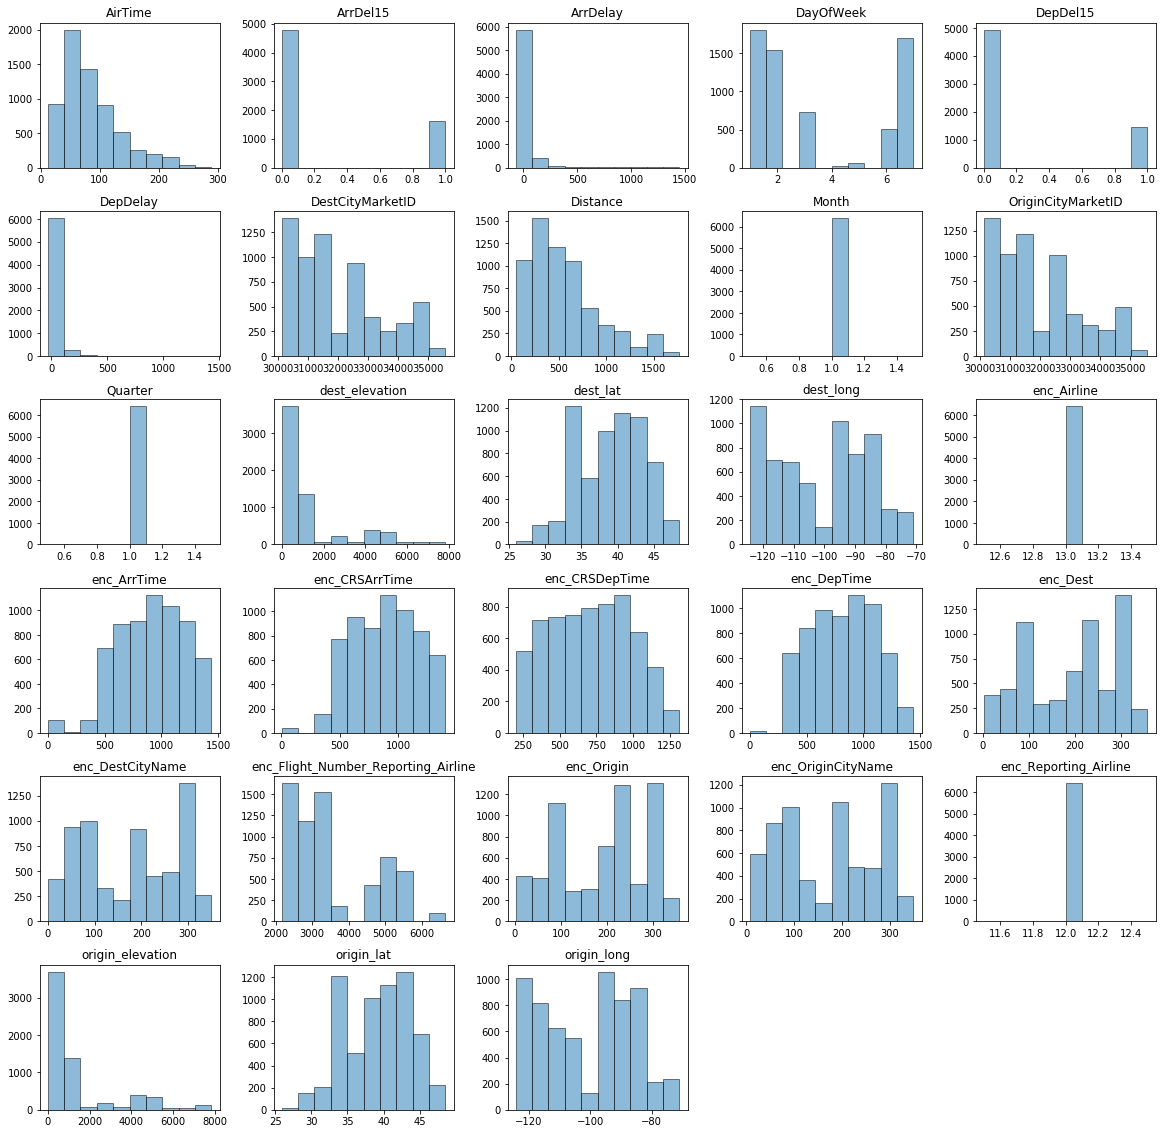

In [13]:
airline_data_for_hist.hist(figsize = (20, 20), alpha = 0.5,
                     edgecolor = 'black', grid = False);

In [14]:
airline_data['Distance'].describe()

count    6407.000000
mean      548.153894
std       368.065777
min        45.000000
25%       266.000000
50%       455.000000
75%       733.000000
max      1772.000000
Name: Distance, dtype: float64

The minimum distance is 45 miles and maximum distance is 1772 miles. The standard deviation is 368 and the mean is 548. So some of these distances might be outlier.

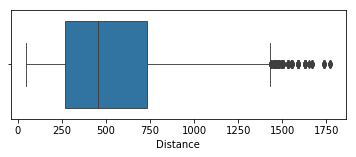

In [15]:
plt.figure(figsize = (6, 2))
sns.boxplot(x = airline_data['Distance'], linewidth= 0.9);

The box plot clearly shows that there are several outliers on the higher end of the distribution. It seems distance past the miles above 1500 are skewing the distribution.

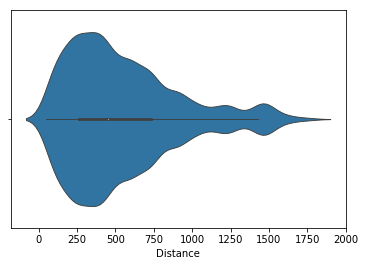

In [16]:
sns.violinplot(x = airline_data['Distance'], linewidth = 0.9);

The wider portion of the violin demonstrates a greater probability of values occurring, So distance around 250-500 are most occuring trips.